# Stock Data Analysis Part 1

This is a project that a finance job interviewer asked me to do. He provided four sets of stock information, namely:

- Bid-Ask
- Tick matches
- ATO/ATC
- Financial Statement 10Y

I will explore the datasets to find interesting insights for investment purposes.

According to the heavy dataset that overloaded my laptop, I decided to pick one stock for testing, which is 'DELTA'. It has the highest market capitalization of SET and the most bid-ask data.

In [1]:
# load data of 'DELTA' stock

import pandas as pd
from datetime import datetime

bidask = pd.read_csv('stocksm_bidasks_202304011736.csv')
tick = pd.read_csv('stocksm_tickmatchs_202304011820.csv')
atoatc = pd.read_csv('stocksm_atoatcs_202304012017.csv')
daily_vol = pd.read_csv('SET_DLY_DELTA, 1D.csv')

print(bidask.shape)
print(tick.shape)
print(atoatc.shape)
print(daily_vol.shape)

(2386722, 24)
(1869136, 7)
(385, 18)
(389, 7)


In [3]:
bidask.head(5)

_id Symbol                 Time   Ask1   Ask2   Ask3   Ask4   Ask5  \
0  69459793  DELTA  2021-08-27 09:55:13  532.0  524.0  510.0  490.0    0.0   
1  69459794  DELTA  2021-08-27 09:56:13  572.0  570.0  568.0  566.0  564.0   
2  69459795  DELTA  2021-08-27 09:56:14  572.0  570.0  568.0  566.0  564.0   
3  69459796  DELTA  2021-08-27 09:56:15  572.0  570.0  568.0  566.0  564.0   
4  69459797  DELTA  2021-08-27 09:56:15  572.0  570.0  568.0  566.0  564.0   

           Bid1   Bid2  ...  VolAsk2  VolAsk3  VolAsk4  VolAsk5  VolBid1  \
0  9.223372e+12  588.0  ...      100     1100      100      400     5400   
1  5.620000e+02  560.0  ...    10700     3500     3000     6400      600   
2  5.620000e+02  560.0  ...    10700     3500     3000     6400      600   
3  5.620000e+02  560.0  ...    10700     3600     3000     6400      600   
4  5.620000e+02  560.0  ...    10700     3600     3000     6400      600   

   VolBid2  VolBid3  VolBid4  VolBid5           updated_at  
0      100      500      100     1700  2021-08-26 00:00:00  
1     6500     6200     4200    11000  2021-08-27 00:00:00  
2     6500     6200     4200    11000  2021-08-27 00:00:00  
3     6500     6200     4200    11000  2021-08-27 00:00:00  
4     6500     6200     4200    11000  2021-08-27 00:00:00  

[5 rows x 24 columns]

In [4]:
tick.head(5)

_id Symbol                 Time   Last   Vol     Type  \
0  66096137  DELTA  2021-08-27 09:55:26  564.0  9000  ATO/ATC   
1  66096138  DELTA  2021-08-27 09:55:34  566.0   100      BUY   
2  66096139  DELTA  2021-08-27 09:55:38  564.0   300     SELL   
3  66096140  DELTA  2021-08-27 09:55:48  564.0   100     SELL   
4  66096141  DELTA  2021-08-27 09:55:43  564.0   100     SELL   

            updated_at  
0  2021-08-27 00:00:00  
1  2021-08-27 00:00:00  
2  2021-08-27 00:00:00  
3  2021-08-27 00:00:00  
4  2021-08-27 00:00:00

In [5]:
atoatc.head(5)

_id Symbol  VolATO1  PriceATO1  Close(T_1)  VolATO2  PriceATO2  \
0   121  DELTA        0        0.0         0.0        0        0.0   
1   938  DELTA    68500      746.0       726.0    15100      744.0   
2  1756  DELTA        0        0.0         0.0     2200      758.0   
3  2571  DELTA    18800      740.0       756.0    24400      758.0   
4  3386  DELTA    40200      760.0       768.0     6100      756.0   

   Price12_30  VolATC  PriceATC  Price16_30  PercentChgSS1  ValueSS1  \
0         0.0  441000     584.0       584.0           0.00         0   
1       744.0  288600     730.0       726.0           2.75  51101000   
2       762.0     100     756.0       756.0           0.00         0   
3       758.0     500     764.0       760.0          -2.12  13912000   
4       758.0  109700     744.0       748.0          -1.04  30552000   

   PercentChgSS2  ValueSS2  PercentChgATC   ValueATC  updated_at  
0           0.00         0           0.00  257544000  2021-08-31  
1           0.00  11234400           0.55  210678000  2021-09-03  
2          -0.52   1667600           0.00      75600  2021-09-07  
3           0.00  18495200           0.53     382000  2021-09-08  
4          -0.26   4611600          -0.53   81616800  2021-09-09

In [14]:
daily_vol.head(5)

time  open  high  low  close   Volume  Volume MA
0  2021-08-27T09:00:00+07:00   564   576  562    566   816900   890700.0
1  2021-08-30T09:00:00+07:00   562   576  556    570  1449600   982080.0
2  2021-08-31T09:00:00+07:00   564   590  564    584  2035600  1253840.0
3  2021-09-01T09:00:00+07:00   594   660  590    656  6737100  2377780.0
4  2021-09-02T09:00:00+07:00   660   736  654    726  8388300  3885500.0

# Date time arrangement

In [2]:
# Separate date time

bidask[['Date','ba_Time']] = bidask['Time'].str.split(n=1, expand=True)
bidask['Date'] = pd.to_datetime(bidask['Date'])
bidask['ba_Time'] = pd.to_datetime(bidask['ba_Time'], format='%H:%M:%S').dt.time

# Drop unnecessary column
bidask = bidask.drop(['_id','Symbol','Time','updated_at'],axis=1) 
bidask.head(5)

Ask1   Ask2   Ask3   Ask4   Ask5          Bid1   Bid2   Bid3   Bid4  \
0  532.0  524.0  510.0  490.0    0.0  9.223372e+12  588.0  584.0  576.0   
1  572.0  570.0  568.0  566.0  564.0  5.620000e+02  560.0  558.0  556.0   
2  572.0  570.0  568.0  566.0  564.0  5.620000e+02  560.0  558.0  556.0   
3  572.0  570.0  568.0  566.0  564.0  5.620000e+02  560.0  558.0  556.0   
4  572.0  570.0  568.0  566.0  564.0  5.620000e+02  560.0  558.0  556.0   

    Bid5  ...  VolAsk3  VolAsk4  VolAsk5  VolBid1  VolBid2  VolBid3  VolBid4  \
0  570.0  ...     1100      100      400     5400      100      500      100   
1  554.0  ...     3500     3000     6400      600     6500     6200     4200   
2  554.0  ...     3500     3000     6400      600     6500     6200     4200   
3  554.0  ...     3600     3000     6400      600     6500     6200     4200   
4  554.0  ...     3600     3000     6400      600     6500     6200     4200   

   VolBid5       Date   ba_Time  
0     1700 2021-08-27  09:55:13  
1    11000 2021-08-27  09:56:13  
2    11000 2021-08-27  09:56:14  
3    11000 2021-08-27  09:56:15  
4    11000 2021-08-27  09:56:15  

[5 rows x 22 columns]

In [3]:
# Tick date time

tick[['Date','tickTime']] = tick['Time'].str.split(n=1, expand=True)
tick['Date'] = pd.to_datetime(tick['Date'])
tick['tickTime'] = pd.to_datetime(tick['tickTime'], format='%H:%M:%S').dt.time
tick = tick.drop(['_id','Symbol','Time','updated_at'],axis=1)
tick.head(5)

Last   Vol     Type       Date  tickTime
0  564.0  9000  ATO/ATC 2021-08-27  09:55:26
1  566.0   100      BUY 2021-08-27  09:55:34
2  564.0   300     SELL 2021-08-27  09:55:38
3  564.0   100     SELL 2021-08-27  09:55:48
4  564.0   100     SELL 2021-08-27  09:55:43

In [4]:
# Daily Volomn date time

# Convert the 'time' column to datetime format
daily_vol['time'] = pd.to_datetime(daily_vol['time'])

# Extract only the date from the 'time' column
daily_vol['Date'] = daily_vol['time'].dt.date
daily_vol['Date'] = pd.to_datetime(daily_vol['Date'])

# Drop the 'time' column
daily_vol = daily_vol.drop('time', axis=1)

# Change the name of the 'Volume MA' column to 'Vol_5MA' 
daily_vol = daily_vol.rename(columns={'Volume MA':'Vol_5MA'})

daily_vol.head(5)

open  high  low  close   Volume    Vol_5MA       Date
0   564   576  562    566   816900   890700.0 2021-08-27
1   562   576  556    570  1449600   982080.0 2021-08-30
2   564   590  564    584  2035600  1253840.0 2021-08-31
3   594   660  590    656  6737100  2377780.0 2021-09-01
4   660   736  654    726  8388300  3885500.0 2021-09-02

In [5]:
# drop column from atoatc data

atoatc = atoatc.drop(['_id','Symbol'],axis=1)
atoatc = atoatc.rename(columns={'updated_at':'Date'})
atoatc['Date'] = pd.to_datetime(atoatc['Date'])

atoatc.head(5)

VolATO1  PriceATO1  Close(T_1)  VolATO2  PriceATO2  Price12_30  VolATC  \
0        0        0.0         0.0        0        0.0         0.0  441000   
1    68500      746.0       726.0    15100      744.0       744.0  288600   
2        0        0.0         0.0     2200      758.0       762.0     100   
3    18800      740.0       756.0    24400      758.0       758.0     500   
4    40200      760.0       768.0     6100      756.0       758.0  109700   

   PriceATC  Price16_30  PercentChgSS1  ValueSS1  PercentChgSS2  ValueSS2  \
0     584.0       584.0           0.00         0           0.00         0   
1     730.0       726.0           2.75  51101000           0.00  11234400   
2     756.0       756.0           0.00         0          -0.52   1667600   
3     764.0       760.0          -2.12  13912000           0.00  18495200   
4     744.0       748.0          -1.04  30552000          -0.26   4611600   

   PercentChgATC   ValueATC       Date  
0           0.00  257544000 2021-08-31  
1           0.55  210678000 2021-09-03  
2           0.00      75600 2021-09-07  
3           0.53     382000 2021-09-08  
4          -0.53   81616800 2021-09-09

# Define idea

Based on the database I've seen, I have decided to analyze the short-term price action of the stock market. I believe that:

    "For stocks to go up, they need to have higher trading volume."

With that in mind, I would like to explore the following questions:

- How does the `daily volume` and `atoatc` data affect the closing price versus the opening price of "DELTA" stocks?
- For stocks that increase in price within a day, what is the best way to place a `bidask` and `ticker`?

## "How does daily volume and atoatc data affect the closing price versus the opening price of 'DELTA' stocks? 

For this trade idea, my focus will be on the percentage change between the closing and opening prices within the same day."

In [9]:
# Merge data

merged_df1 = pd.merge(daily_vol,atoatc, on='Date',how='left')

merged_df1.head(10)

open  high  low  close   Volume    Vol_5MA       Date  VolATO1  PriceATO1  \
0   564   576  562    566   816900   890700.0 2021-08-27      NaN        NaN   
1   562   576  556    570  1449600   982080.0 2021-08-30      NaN        NaN   
2   564   590  564    584  2035600  1253840.0 2021-08-31      0.0        0.0   
3   594   660  590    656  6737100  2377780.0 2021-09-01      NaN        NaN   
4   660   736  654    726  8388300  3885500.0 2021-09-02      NaN        NaN   
5   746   790  724    730  4578400  4637800.0 2021-09-03  68500.0      746.0   
6   740   778  736    764  3045800  4957040.0 2021-09-06      NaN        NaN   
7   780   782  742    742  2157200  4981360.0 2021-09-07      0.0        0.0   
8   740   774  738    768  2553000  4144540.0 2021-09-08  18800.0      740.0   
9   760   776  744    744  1959800  2858840.0 2021-09-09  40200.0      760.0   

   Close(T_1)  ...  Price12_30    VolATC  PriceATC  Price16_30  PercentChgSS1  \
0         NaN  ...         NaN       NaN       NaN         NaN            NaN   
1         NaN  ...         NaN       NaN       NaN         NaN            NaN   
2         0.0  ...         0.0  441000.0     584.0       584.0           0.00   
3         NaN  ...         NaN       NaN       NaN         NaN            NaN   
4         NaN  ...         NaN       NaN       NaN         NaN            NaN   
5       726.0  ...       744.0  288600.0     730.0       726.0           2.75   
6         NaN  ...         NaN       NaN       NaN         NaN            NaN   
7         0.0  ...       762.0     100.0     756.0       756.0           0.00   
8       756.0  ...       758.0     500.0     764.0       760.0          -2.12   
9       768.0  ...       758.0  109700.0     744.0       748.0          -1.04   

     ValueSS1  PercentChgSS2    ValueSS2  PercentChgATC     ValueATC  
0         NaN            NaN         NaN            NaN          NaN  
1         NaN            NaN         NaN            NaN          NaN  
2         0.0           0.00         0.0           0.00  257544000.0  
3         NaN            NaN         NaN            NaN          NaN  
4         NaN            NaN         NaN            NaN          NaN  
5  51101000.0           0.00  11234400.0           0.55  210678000.0  
6         NaN            NaN         NaN            NaN          NaN  
7         0.0          -0.52   1667600.0           0.00      75600.0  
8  13912000.0           0.00  18495200.0           0.53     382000.0  
9  30552000.0          -0.26   4611600.0          -0.53   81616800.0  

[10 rows x 22 columns]

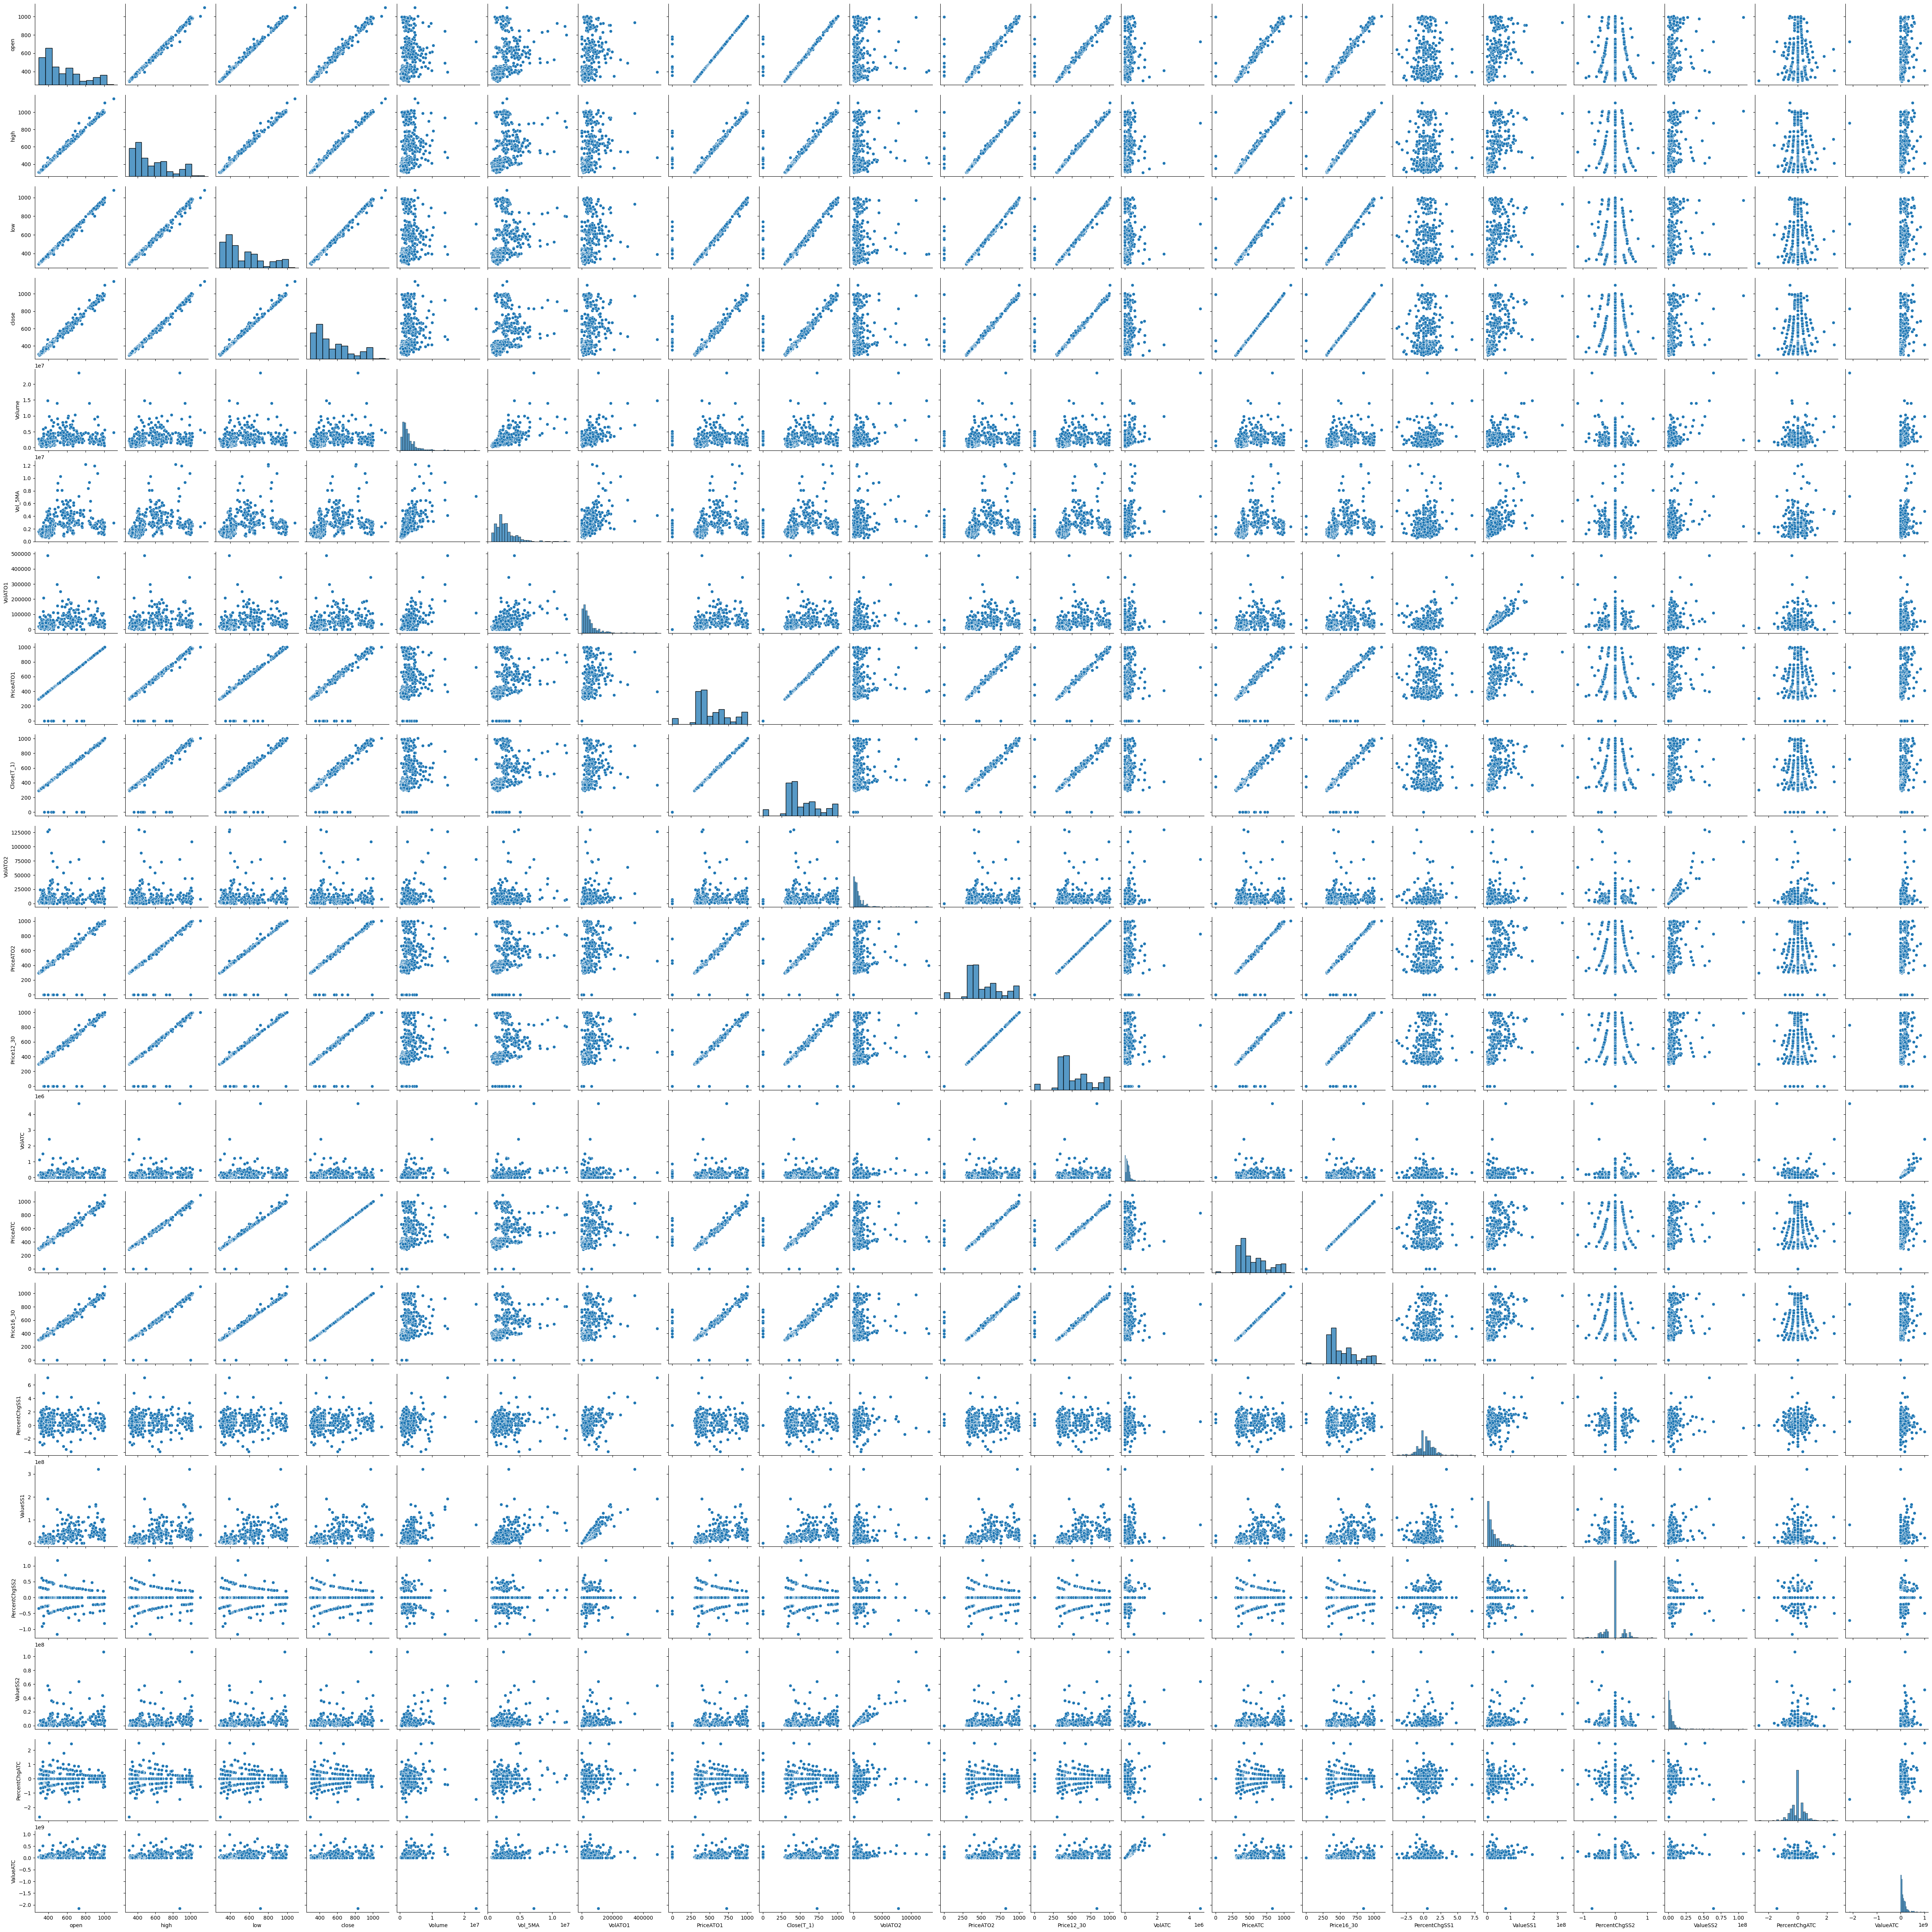

In [51]:
# See pair chart

import seaborn as sns
import matplotlib.pyplot as plt

# create pair plot
sns.pairplot(merged_df1)

# display plot
plt.show()

In [10]:
merged_df1.isna().sum()

open              0
high              0
low               0
close             0
Volume            0
Vol_5MA           0
Date              0
VolATO1          19
PriceATO1        19
Close(T_1)       19
VolATO2          19
PriceATO2        19
Price12_30       19
VolATC           19
PriceATC         19
Price16_30       19
PercentChgSS1    19
ValueSS1         19
PercentChgSS2    19
ValueSS2         19
PercentChgATC    19
ValueATC         19
dtype: int64

### Target
- today_close and tomorrow_open (If I want to buy this day then sold tomorrow open)
- today_close and tomorrow_close (If I want to buy this day then sold tomorrow close)
- today_close and today_open (If I want to buy today open then sold today close)
- today_close and priceATO2 (If I want to buy today afternoon open then sold today close)

### Create Percent Change column

In [11]:
# Create PercentChg column

# today_close and tomorrow_open
merged_df1['chg_Ct_Ot1'] = round((merged_df1['open'].shift(-1)-merged_df1['close'])/merged_df1['close'],4)
merged_df1['chg_Ct_Ot1'].head()

0   -0.0071
1   -0.0105
2    0.0171
3    0.0061
4    0.0275
Name: chg_Ct_Ot1, dtype: float64

In [12]:
# Open jump (Today open compare with yesterday close)

merged_df1['today_jump'] = merged_df1['chg_Ct_Ot1'].shift(1)
merged_df1['today_jump'].head()

0       NaN
1   -0.0071
2   -0.0105
3    0.0171
4    0.0061
Name: today_jump, dtype: float64

In [13]:
# today_close and today_open
merged_df1['chg_Ct_Ot'] = round((merged_df1['close']-merged_df1['open'])/merged_df1['open'],4)
merged_df1['chg_Ct_Ot'].head()

0    0.0035
1    0.0142
2    0.0355
3    0.1044
4    0.1000
Name: chg_Ct_Ot, dtype: float64

In [14]:
# today_close and tomorrow_close
merged_df1['chg_Ct_Ct1'] = round((merged_df1['close'].shift(-1)-merged_df1['close'])/merged_df1['close'],4)
merged_df1['chg_Ct_Ct1'].head()

0    0.0071
1    0.0246
2    0.1233
3    0.1067
4    0.0055
Name: chg_Ct_Ct1, dtype: float64

In [15]:
# compare today volumn with average 5 day volumn

merged_df1['comp5ma'] =  round((merged_df1['Volume']/merged_df1['Vol_5MA']),4)
merged_df1['comp5ma'].head()

0    0.9171
1    1.4761
2    1.6235
3    2.8334
4    2.1589
Name: comp5ma, dtype: float64

In [16]:
# Previuos compare today volumn with average 5 day volumn

merged_df1['PreComp5ma'] =  merged_df1['comp5ma'].shift(1)
merged_df1['PreComp5ma'].head()

0       NaN
1    0.9171
2    1.4761
3    1.6235
4    2.8334
Name: PreComp5ma, dtype: float64

In [17]:
# percent of daily swing (high - low)/low

merged_df1['swing'] = round(((merged_df1['high']-merged_df1['low'])/merged_df1['low']),4)
merged_df1['swing'].head()

0    0.0249
1    0.0360
2    0.0461
3    0.1186
4    0.1254
Name: swing, dtype: float64

In [18]:
# ratio of Volumn ATO morning and previous day volumn

merged_df1['rt_VolATO1_PreVol'] = round((merged_df1['VolATO1']/merged_df1['Volume'].shift(1)),4)
merged_df1['rt_VolATO1_PreVol'].head(10)

0       NaN
1       NaN
2    0.0000
3       NaN
4       NaN
5    0.0082
6       NaN
7    0.0000
8    0.0087
9    0.0157
Name: rt_VolATO1_PreVol, dtype: float64

In [19]:
# ratio of Volumn ATO afternoon to Volumn ATO morning

merged_df1['rt_VolATO2_VolATO1'] = round((merged_df1['VolATO2']/merged_df1['VolATO1']),4)
merged_df1['rt_VolATO2_VolATO1'].head(10)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5    0.2204
6       NaN
7       inf
8    1.2979
9    0.1517
Name: rt_VolATO2_VolATO1, dtype: float64

In [20]:
# percent change of Price ATO2 to Price ATO1

merged_df1['chg_PriceATO2_PriceATO1'] = round(((merged_df1['PriceATO2']-merged_df1['PriceATO1'])/merged_df1['PriceATO1']),4)
merged_df1['chg_PriceATO2_PriceATO1'].head(10)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5   -0.0027
6       NaN
7       inf
8    0.0243
9   -0.0053
Name: chg_PriceATO2_PriceATO1, dtype: float64

In [21]:
# ratio of Volumn ATC to Volumn ATO afternoon

merged_df1['rt_VolATC_VolATO2'] = round((merged_df1['VolATC']/merged_df1['VolATO2']),4)
merged_df1['rt_VolATC_VolATO2'].head(10)

0        NaN
1        NaN
2        inf
3        NaN
4        NaN
5    19.1126
6        NaN
7     0.0455
8     0.0205
9    17.9836
Name: rt_VolATC_VolATO2, dtype: float64

In [22]:
# percent change of Price ATC to Price ATO2

merged_df1['chg_PriceATC_PriceATO2'] = round(((merged_df1['PriceATC']-merged_df1['PriceATO2'])/merged_df1['PriceATO2']),4)
merged_df1['chg_PriceATC_PriceATO2'].head(10)

0       NaN
1       NaN
2       inf
3       NaN
4       NaN
5   -0.0188
6       NaN
7   -0.0026
8    0.0079
9   -0.0159
Name: chg_PriceATC_PriceATO2, dtype: float64

### Prepare data

In [23]:
# drop na
import numpy as np

# replace Infinity values with NaN values
clean_merged1 = merged_df1.replace([np.inf, -np.inf], np.nan)

# drop rows containing NaN values
clean_merged1 = clean_merged1.dropna(axis=0, how='any')
clean_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 5 to 402
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   open                     365 non-null    int64         
 1   high                     365 non-null    int64         
 2   low                      365 non-null    int64         
 3   close                    365 non-null    int64         
 4   Volume                   365 non-null    int64         
 5   Vol_5MA                  365 non-null    float64       
 6   Date                     365 non-null    datetime64[ns]
 7   VolATO1                  365 non-null    float64       
 8   PriceATO1                365 non-null    float64       
 9   Close(T_1)               365 non-null    float64       
 10  VolATO2                  365 non-null    float64       
 11  PriceATO2                365 non-null    float64       
 12  Price12_30               365 non-nul

In [24]:
# drop unecessary column

clean_merged1 = clean_merged1.drop(['open','high','low','close','Vol_5MA','Date','PriceATO1','Close(T_1)','PriceATO2',
                                    'Price12_30','PriceATC','Price16_30','PercentChgSS1','ValueSS1','PercentChgSS2',
                                   'ValueSS2'],axis=1)
clean_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 5 to 402
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Volume                   365 non-null    int64  
 1   VolATO1                  365 non-null    float64
 2   VolATO2                  365 non-null    float64
 3   VolATC                   365 non-null    float64
 4   PercentChgATC            365 non-null    float64
 5   ValueATC                 365 non-null    float64
 6   chg_Ct_Ot1               365 non-null    float64
 7   today_jump               365 non-null    float64
 8   chg_Ct_Ot                365 non-null    float64
 9   chg_Ct_Ct1               365 non-null    float64
 10  comp5ma                  365 non-null    float64
 11  PreComp5ma               365 non-null    float64
 12  swing                    365 non-null    float64
 13  rt_VolATO1_PreVol        365 non-null    float64
 14  rt_VolATO2_VolATO1       3

In [25]:
clean_merged1.head()

Volume  VolATO1  VolATO2    VolATC  PercentChgATC     ValueATC  \
5   4578400  68500.0  15100.0  288600.0           0.55  210678000.0   
8   2553000  18800.0  24400.0     500.0           0.53     382000.0   
9   1959800  40200.0   6100.0  109700.0          -0.53   81616800.0   
10  1560900  38600.0  16100.0  123300.0           0.00   93708000.0   
16  2686800  69600.0  15000.0  213000.0           0.00  118428000.0   

    chg_Ct_Ot1  today_jump  chg_Ct_Ot  chg_Ct_Ct1  comp5ma  PreComp5ma  \
5       0.0137      0.0275    -0.0214      0.0466   0.9872      2.1589   
8      -0.0104     -0.0027     0.0378     -0.0312   0.6160      0.4331   
9       0.0242     -0.0104    -0.0211      0.0215   0.6855      0.6160   
10     -0.0053      0.0242    -0.0026     -0.1421   0.6921      0.6855   
16     -0.0072      0.0071    -0.0246     -0.1043   0.5568      0.9726   

     swing  rt_VolATO1_PreVol  rt_VolATO2_VolATO1  chg_PriceATO2_PriceATO1  \
5   0.0912             0.0082              0.2204                  -0.0027   
8   0.0488             0.0087              1.2979                   0.0243   
9   0.0430             0.0157              0.1517                  -0.0053   
10  0.0293             0.0197              0.4171                   0.0079   
16  0.0325             0.0141              0.2155                  -0.0175   

    rt_VolATC_VolATO2  chg_PriceATC_PriceATO2  
5             19.1126                 -0.0188  
8              0.0205                  0.0079  
9             17.9836                 -0.0159  
10             7.6584                 -0.0104  
16            14.2000                 -0.0071

In [26]:
# See pair chart

import seaborn as sns
import matplotlib.pyplot as plt

# create pair plot
sns.pairplot(clean_merged1)

# display plot
plt.show()

## Machine learning

In [32]:
# Import library

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

### Idea : Can we make a profit with "Buy today close price then Sold tomorrow open price"

Let's see, if we want to buy today close price and sold tomorrow opening. What parameter that we still don't know yet.
- `Volume` : Today trading volumn = Yes , we pretty know before closing day 
- `VolATO1` : Today Morning Opening volumn = Yes, we can know  
- `VolATO2` : Afternoon Opening volumn = Yes, we can know
- `VolATC` : At the close volumn = Yes , we pretty know before closing day 
- `PercentChgATC` : Percent Change of ATC price from 16:30PM price = Yes , we pretty know before closing day
- `ValueATC` : Value of ATC = Yes , we pretty know before closing day 
- `chg_Ct_Ot1` : Percent change between today closing price and tomorow opening price = This is **Target**
- `chg_Ct_Ot` : Percent change between today closing price and today opening price = Yes , we pretty know before closing day
- `chg_Ct_Ct1` : Percent change between today closing price and tomorow closing price = **No, we can't**
- `today_jump` : Percent change between today morning opening price and yesterday closing price = Yes, we can know
- `comp5ma` : Ratio of today volumn and average 5 day volumn = Yes , we pretty know before closing day
- `PreComp5ma` : Ratio of previous volumn and average 5 day volumn = Yes, we can know
- `swing` : Percent swing of daily swing (high - low)/low = Yes, we can know
- `rt_VolATO1_PreVol` : Ratio of today opening volmn in the morning and previos day volumn = Yes, we can know
- `chg_PriceATO2_PriceATO1` : Percent change between Afternoon price from Morning price = Yes, we can know
- `rt_VolATO2_VolATO1` : Ratio of Afternoon opening volumn and Morning opening volumn = Yes, we can know
- `rt_VolATC_VolATO2` : Ratio of Closing volumn and Afternoon opening volumn  = Yes , we pretty know before closing day
- `chg_PriceATC_PriceATO2` : Percent change between Closing price and Afternoon opening price = Yes , we pretty know before closing day

In [28]:
# X = feature variables, y = a target variable

X = clean_merged1.drop(["chg_Ct_Ot1","chg_Ct_Ct1"], axis=1)
y = clean_merged1['chg_Ct_Ot1']

print(X.shape)
print(y.shape)

(365, 16)
(365,)


In [29]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (292, 16)
y_train: (292,)
X_test:  (73, 16)
y_test:  (73,)


### Model fitting

In [30]:
# Model fitting

# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
enet_model = ElasticNet(alpha = 0.01)
enet_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.674e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


ElasticNet(alpha=0.01)

### Model evaluation

In [31]:
# Model evaluation

# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")

# Lasso Regression
pred_lasso_test = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, pred_lasso_test, squared=False).round(4)
test_r2_lasso = lasso_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Lasso model : {rmse_lasso}")
print(f"R-squared from Lasso model : {test_r2_lasso}")

# ElasticNet Regression
pred_enet_test = enet_model.predict(X_test)
rmse_enet = mean_squared_error(y_test, pred_enet_test, squared=False).round(4)
test_r2_enet = enet_model.score(X_test, y_test).round(4)
print(f"\nRMSE from ElasticNet model : {rmse_enet}")
print(f"R-squared from ElasticNet model : {test_r2_enet}")

RMSE from Linear model : 0.0128
R-squared from Linear model : -0.1659

RMSE from Logistic model : 0.0128
R-squared from Logistic model : -0.1659

RMSE from Ridge model : 0.0127
R-squared from Ridge model : -0.144

RMSE from Lasso model : 0.0119
R-squared from Lasso model : -0.013

RMSE from ElasticNet model : 0.0119
R-squared from ElasticNet model : -0.013


#### Very low R-squared it mean the model is performing slightly worse 



#### So I just want to know tomorrow opening price are up or down from today closing price. Test by classifition model

In [32]:
# Change Target pameter to 1= Up, 0 = Don't up

clean_merged1['Target_Ct_Ot1'] = np.where(clean_merged1['chg_Ct_Ot1'] > 0, 1, 0)
clean_merged1.head()

Volume  VolATO1  VolATO2    VolATC  PercentChgATC     ValueATC  \
5   4578400  68500.0  15100.0  288600.0           0.55  210678000.0   
8   2553000  18800.0  24400.0     500.0           0.53     382000.0   
9   1959800  40200.0   6100.0  109700.0          -0.53   81616800.0   
10  1560900  38600.0  16100.0  123300.0           0.00   93708000.0   
16  2686800  69600.0  15000.0  213000.0           0.00  118428000.0   

    chg_Ct_Ot1  chg_Ct_Ot  chg_Ct_Ct1  today_jump  comp5ma  PreComp5ma  \
5       0.0137    -0.0214      0.0466      0.0275   0.9872      2.1589   
8      -0.0104     0.0378     -0.0312     -0.0027   0.6160      0.4331   
9       0.0242    -0.0211      0.0215     -0.0104   0.6855      0.6160   
10     -0.0053    -0.0026     -0.1421      0.0242   0.6921      0.6855   
16     -0.0072    -0.0246     -0.1043      0.0071   0.5568      0.9726   

     swing  rt_VolATO1_PreVol  rt_VolATO2_VolATO1  chg_PriceATO2_PriceATO1  \
5   0.0912             0.0082              0.2204                  -0.0027   
8   0.0488             0.0087              1.2979                   0.0243   
9   0.0430             0.0157              0.1517                  -0.0053   
10  0.0293             0.0197              0.4171                   0.0079   
16  0.0325             0.0141              0.2155                  -0.0175   

    rt_VolATC_VolATO2  chg_PriceATC_PriceATO2  Target_Ct_Ot1  
5             19.1126                 -0.0188              1  
8              0.0205                  0.0079              0  
9             17.9836                 -0.0159              1  
10             7.6584                 -0.0104              0  
16            14.2000                 -0.0071              0

In [33]:
# X = feature variables, y = a target variable

X = clean_merged1.drop(["chg_Ct_Ot1","chg_Ct_Ct1","Target_Ct_Ot1"], axis=1)
y = clean_merged1['Target_Ct_Ot1']

print(X.shape)
print(y.shape)

(365, 16)
(365,)


In [34]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (292, 16)
y_train: (292,)
X_test:  (73, 16)
y_test:  (73,)


### Classification Model fitting

In [35]:
# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

# Evaluate model
dt_train_pred = dt_model.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
print(f"Accuracy of DecisionTree model from train data : {dt_train_acc}")

Accuracy of DecisionTree model from train data : 0.9897260273972602


In [36]:
# K-Nearest Neighbors (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Evaluate model
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {knn_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.7191780821917808


In [37]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model = rf.fit(X_train, y_train)

# Evaluate model
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {rf_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.9726027397260274


### Classification Model evaluation

In [38]:
# DecisionTree Classifier
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='micro')
dt_rec = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred, average = 'micro')


print(f"DecisionTree Accuracy score: {round(dt_acc,2)}")
print(f"DecisionTree Precision score: {round(dt_prec,2)}")
print(f"DecisionTree Recall score: {round(dt_rec,2)}")
print(f"DecisionTree F1 score: {round(dt_f1,2)}")

DecisionTree Accuracy score: 0.62
DecisionTree Precision score: 0.62
DecisionTree Recall score: 0.62
DecisionTree F1 score: 0.62


In [39]:
# K-Nearest Neighbors (KNN) Classifier
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='micro')
knn_rec = recall_score(y_test, knn_pred, average='micro')
knn_f1 = f1_score(y_test, knn_pred, average = 'micro')


print(f"K-Nearest Neighbors Accuracy score: {round(knn_acc,2)}")
print(f"K-Nearest Neighbors Precision score: {round(knn_prec,2)}")
print(f"K-Nearest Neighbors Recall score: {round(knn_rec,2)}")
print(f"K-Nearest Neighbors F1 score: {round(knn_f1,2)}")

K-Nearest Neighbors Accuracy score: 0.67
K-Nearest Neighbors Precision score: 0.67
K-Nearest Neighbors Recall score: 0.67
K-Nearest Neighbors F1 score: 0.67


In [40]:
# Random Forest Classifier
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='micro')
rf_rec = recall_score(y_test, rf_pred, average='micro')
rf_f1 = f1_score(y_test, rf_pred, average = 'micro')


print(f"Random Forest Accuracy score: {round(rf_acc,2)}")
print(f"Random Forest Precision score: {round(rf_prec,2)}")
print(f"Random Forest Recall score: {round(rf_rec,2)}")
print(f"Random Forest F1 score: {round(rf_f1,2)}")

Random Forest Accuracy score: 0.56
Random Forest Precision score: 0.56
Random Forest Recall score: 0.56
Random Forest F1 score: 0.56


### The highest score to prediction that tomorrow opening price will be above from today closing price or not is "K-Nearest Neighbors model". However it still low score (0.67)

### Idea : Can we make a profit with "Buy today close price then Sold tomorrow close price"

Select parameter
- `Volume` : Today trading volumn = Yes , we pretty know before closing day 
- `VolATO1` : Today Morning Opening volumn = Yes, we can know  
- `VolATO2` : Afternoon Opening volumn = Yes, we can know
- `VolATC` : At the close volumn = Yes , we pretty know before closing day 
- `PercentChgATC` : Percent Change of ATC price from 16:30PM price = Yes , we pretty know before closing day
- `ValueATC` : Value of ATC = Yes , we pretty know before closing day 
- `chg_Ct_Ot1` : Percent change between today closing price and tomorow opening price = **No, we can't**
- `chg_Ct_Ot` : Percent change between today closing price and today opening price = Yes , we pretty know before closing day
- `chg_Ct_Ct1` : Percent change between today closing price and tomorow closing price = This is **Target**
- `today_jump` : Percent change between today morning opening price and yesterday closing price = Yes, we can know
- `comp5ma` : Ratio of today volumn and average 5 day volumn = Yes , we pretty know before closing day
- `PreComp5ma` : Ratio of previous volumn and average 5 day volumn = Yes, we can know
- `swing` : Percent swing of daily swing (high - low)/low = Yes, we can know
- `rt_VolATO1_PreVol` : Ratio of today opening volmn in the morning and previos day volumn = Yes, we can know
- `chg_PriceATO2_PriceATO1` : Percent change between Afternoon price from Morning price = Yes, we can know
- `rt_VolATO2_VolATO1` : Ratio of Afternoon opening volumn and Morning opening volumn = Yes, we can know
- `rt_VolATC_VolATO2` : Ratio of Closing volumn and Afternoon opening volumn  = Yes , we pretty know before closing day
- `chg_PriceATC_PriceATO2` : Percent change between Closing price and Afternoon opening price = Yes , we pretty know before closing day

In [41]:
# Delete previos Target column

del clean_merged1['Target_Ct_Ot1']

In [42]:
# X = feature variables, y = a target variable

X = clean_merged1.drop(["chg_Ct_Ot1","chg_Ct_Ct1"], axis=1)
y = clean_merged1['chg_Ct_Ct1']

print(X.shape)
print(y.shape)

(365, 16)
(365,)


In [43]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (292, 16)
y_train: (292,)
X_test:  (73, 16)
y_test:  (73,)


### Model fitting

In [44]:
# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
enet_model = ElasticNet(alpha = 0.01)
enet_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.674e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


ElasticNet(alpha=0.01)

### Model evaluation

In [45]:
# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")

# Lasso Regression
pred_lasso_test = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, pred_lasso_test, squared=False).round(4)
test_r2_lasso = lasso_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Lasso model : {rmse_lasso}")
print(f"R-squared from Lasso model : {test_r2_lasso}")

# ElasticNet Regression
pred_enet_test = enet_model.predict(X_test)
rmse_enet = mean_squared_error(y_test, pred_enet_test, squared=False).round(4)
test_r2_enet = enet_model.score(X_test, y_test).round(4)
print(f"\nRMSE from ElasticNet model : {rmse_enet}")
print(f"R-squared from ElasticNet model : {test_r2_enet}")

RMSE from Linear model : 0.0353
R-squared from Linear model : -0.061

RMSE from Logistic model : 0.0353
R-squared from Logistic model : -0.061

RMSE from Ridge model : 0.0354
R-squared from Ridge model : -0.0636

RMSE from Lasso model : 0.0355
R-squared from Lasso model : -0.0701

RMSE from ElasticNet model : 0.0355
R-squared from ElasticNet model : -0.0718


#### Very low R-squared it mean the model is performing slightly worse 

#### So I just want to know tomorrow closing price are up or down from today closing price. Test by classifition model

In [46]:
# Change Target pameter to 1= Up, 0 = Don't up

clean_merged1['Target_Ct_Ct1'] = np.where(clean_merged1['chg_Ct_Ct1'] > 0, 1, 0)
clean_merged1.head()

Volume  VolATO1  VolATO2    VolATC  PercentChgATC     ValueATC  \
5   4578400  68500.0  15100.0  288600.0           0.55  210678000.0   
8   2553000  18800.0  24400.0     500.0           0.53     382000.0   
9   1959800  40200.0   6100.0  109700.0          -0.53   81616800.0   
10  1560900  38600.0  16100.0  123300.0           0.00   93708000.0   
16  2686800  69600.0  15000.0  213000.0           0.00  118428000.0   

    chg_Ct_Ot1  chg_Ct_Ot  chg_Ct_Ct1  today_jump  comp5ma  PreComp5ma  \
5       0.0137    -0.0214      0.0466      0.0275   0.9872      2.1589   
8      -0.0104     0.0378     -0.0312     -0.0027   0.6160      0.4331   
9       0.0242    -0.0211      0.0215     -0.0104   0.6855      0.6160   
10     -0.0053    -0.0026     -0.1421      0.0242   0.6921      0.6855   
16     -0.0072    -0.0246     -0.1043      0.0071   0.5568      0.9726   

     swing  rt_VolATO1_PreVol  rt_VolATO2_VolATO1  chg_PriceATO2_PriceATO1  \
5   0.0912             0.0082              0.2204                  -0.0027   
8   0.0488             0.0087              1.2979                   0.0243   
9   0.0430             0.0157              0.1517                  -0.0053   
10  0.0293             0.0197              0.4171                   0.0079   
16  0.0325             0.0141              0.2155                  -0.0175   

    rt_VolATC_VolATO2  chg_PriceATC_PriceATO2  Target_Ct_Ct1  
5             19.1126                 -0.0188              1  
8              0.0205                  0.0079              0  
9             17.9836                 -0.0159              1  
10             7.6584                 -0.0104              0  
16            14.2000                 -0.0071              0

In [47]:
# X = feature variables, y = a target variable

X = clean_merged1.drop(["chg_Ct_Ot1","chg_Ct_Ct1","Target_Ct_Ct1"], axis=1)
y = clean_merged1['Target_Ct_Ct1']

print(X.shape)
print(y.shape)

(365, 16)
(365,)


In [48]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (292, 16)
y_train: (292,)
X_test:  (73, 16)
y_test:  (73,)


### Classification Model fitting

In [49]:
# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

# Evaluate model
dt_train_pred = dt_model.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
print(f"Accuracy of DecisionTree model from train data : {dt_train_acc}")

Accuracy of DecisionTree model from train data : 0.9965753424657534


In [50]:
# K-Nearest Neighbors (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Evaluate model
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {knn_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.6883561643835616


In [51]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model = rf.fit(X_train, y_train)

# Evaluate model
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {rf_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.976027397260274


### Classification Model evaluation

In [52]:
# DecisionTree Classifier
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='micro')
dt_rec = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred, average = 'micro')


print(f"DecisionTree Accuracy score: {round(dt_acc,2)}")
print(f"DecisionTree Precision score: {round(dt_prec,2)}")
print(f"DecisionTree Recall score: {round(dt_rec,2)}")
print(f"DecisionTree F1 score: {round(dt_f1,2)}")

DecisionTree Accuracy score: 0.48
DecisionTree Precision score: 0.48
DecisionTree Recall score: 0.48
DecisionTree F1 score: 0.48


In [53]:
# K-Nearest Neighbors (KNN) Classifier
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='micro')
knn_rec = recall_score(y_test, knn_pred, average='micro')
knn_f1 = f1_score(y_test, knn_pred, average = 'micro')


print(f"K-Nearest Neighbors Accuracy score: {round(knn_acc,2)}")
print(f"K-Nearest Neighbors Precision score: {round(knn_prec,2)}")
print(f"K-Nearest Neighbors Recall score: {round(knn_rec,2)}")
print(f"K-Nearest Neighbors F1 score: {round(knn_f1,2)}")

K-Nearest Neighbors Accuracy score: 0.53
K-Nearest Neighbors Precision score: 0.53
K-Nearest Neighbors Recall score: 0.53
K-Nearest Neighbors F1 score: 0.53


In [54]:
# Random Forest Classifier
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='micro')
rf_rec = recall_score(y_test, rf_pred, average='micro')
rf_f1 = f1_score(y_test, rf_pred, average = 'micro')


print(f"Random Forest Accuracy score: {round(rf_acc,2)}")
print(f"Random Forest Precision score: {round(rf_prec,2)}")
print(f"Random Forest Recall score: {round(rf_rec,2)}")
print(f"Random Forest F1 score: {round(rf_f1,2)}")

Random Forest Accuracy score: 0.49
Random Forest Precision score: 0.49
Random Forest Recall score: 0.49
Random Forest F1 score: 0.49


### The highest score to prediction that tomorrow closing price will be above from today closing price or not is "K-Nearest Neighbors model". However it still low score (0.53)

### Idea : Can we make a profit with "Buy today morning open price then Sold today closing price"

Select parameter
- `Volume` : Today trading volumn = **No, we can't**
- `VolATO1` : Today Morning Opening volumn = Yes, we can know  
- `VolATO2` : Afternoon Opening volumn = **No, we can't**
- `VolATC` : At the close volumn = **No, we can't** 
- `PercentChgATC` : Percent Change of ATC price from 16:30PM price = **No, we can't**
- `ValueATC` : Value of ATC = **No, we can't** 
- `chg_Ct_Ot1` : Percent change between today closing price and tomorow opening price = **No, we can't**
- `chg_Ct_Ot` : Percent change between today closing price and today opening price = This is **Target**
- `chg_Ct_Ct1` : Percent change between today closing price and tomorow closing price = **No, we can't**
- `today_jump` : Percent change between today morning opening price and yesterday closing price = Yes, we can know
- `comp5ma` : Ratio of today volumn and average 5 day volumn = **No, we can't**
- `PreComp5ma` : Ratio of previous volumn and average 5 day volumn = Yes, we can know
- `swing` : Percent swing of daily swing (high - low)/low = **No, we can't**
- `rt_VolATO1_PreVol` : Ratio of today opening volmn in the morning and previos day volumn = Yes, we can know
- `chg_PriceATO2_PriceATO1` : Percent change between Afternoon price from Morning price = **No, we can't**
- `rt_VolATO2_VolATO1` : Ratio of Afternoon opening volumn and Morning opening volumn = **No, we can't**
- `rt_VolATC_VolATO2` : Ratio of Closing volumn and Afternoon opening volumn  = **No, we can't**
- `chg_PriceATC_PriceATO2` : Percent change between Closing price and Afternoon opening price = **No, we can't**

In [55]:
# Delete previos Target column

del clean_merged1['Target_Ct_Ct1']
clean_merged1.head()

Volume  VolATO1  VolATO2    VolATC  PercentChgATC     ValueATC  \
5   4578400  68500.0  15100.0  288600.0           0.55  210678000.0   
8   2553000  18800.0  24400.0     500.0           0.53     382000.0   
9   1959800  40200.0   6100.0  109700.0          -0.53   81616800.0   
10  1560900  38600.0  16100.0  123300.0           0.00   93708000.0   
16  2686800  69600.0  15000.0  213000.0           0.00  118428000.0   

    chg_Ct_Ot1  chg_Ct_Ot  chg_Ct_Ct1  today_jump  comp5ma  PreComp5ma  \
5       0.0137    -0.0214      0.0466      0.0275   0.9872      2.1589   
8      -0.0104     0.0378     -0.0312     -0.0027   0.6160      0.4331   
9       0.0242    -0.0211      0.0215     -0.0104   0.6855      0.6160   
10     -0.0053    -0.0026     -0.1421      0.0242   0.6921      0.6855   
16     -0.0072    -0.0246     -0.1043      0.0071   0.5568      0.9726   

     swing  rt_VolATO1_PreVol  rt_VolATO2_VolATO1  chg_PriceATO2_PriceATO1  \
5   0.0912             0.0082              0.2204                  -0.0027   
8   0.0488             0.0087              1.2979                   0.0243   
9   0.0430             0.0157              0.1517                  -0.0053   
10  0.0293             0.0197              0.4171                   0.0079   
16  0.0325             0.0141              0.2155                  -0.0175   

    rt_VolATC_VolATO2  chg_PriceATC_PriceATO2  
5             19.1126                 -0.0188  
8              0.0205                  0.0079  
9             17.9836                 -0.0159  
10             7.6584                 -0.0104  
16            14.2000                 -0.0071

In [56]:
# X = feature variables, y = a target variable

X = clean_merged1[['VolATO1','today_jump','rt_VolATO1_PreVol','PreComp5ma']]
y = clean_merged1['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(365, 4)
(365,)


In [57]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (292, 4)
y_train: (292,)
X_test:  (73, 4)
y_test:  (73,)


### Model fitting

In [58]:
# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
enet_model = ElasticNet(alpha = 0.01)
enet_model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

### Model evaluation

In [59]:
# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")

# Lasso Regression
pred_lasso_test = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, pred_lasso_test, squared=False).round(4)
test_r2_lasso = lasso_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Lasso model : {rmse_lasso}")
print(f"R-squared from Lasso model : {test_r2_lasso}")

# ElasticNet Regression
pred_enet_test = enet_model.predict(X_test)
rmse_enet = mean_squared_error(y_test, pred_enet_test, squared=False).round(4)
test_r2_enet = enet_model.score(X_test, y_test).round(4)
print(f"\nRMSE from ElasticNet model : {rmse_enet}")
print(f"R-squared from ElasticNet model : {test_r2_enet}")

RMSE from Linear model : 0.0319
R-squared from Linear model : 0.0055

RMSE from Logistic model : 0.0319
R-squared from Logistic model : 0.0055

RMSE from Ridge model : 0.0317
R-squared from Ridge model : 0.0171

RMSE from Lasso model : 0.0315
R-squared from Lasso model : 0.0294

RMSE from ElasticNet model : 0.0315
R-squared from ElasticNet model : 0.0294


#### Very low R-squared it mean the model is performing slightly worse 

#### So I just want to know today closing price are up or down from today opening price. Test by classification model

In [60]:
# Change Target pameter to 1= Up, 0 = Don't up

clean_merged1['Target_Ct_Ot'] = np.where(clean_merged1['chg_Ct_Ot'] > 0, 1, 0)
clean_merged1.head()

Volume  VolATO1  VolATO2    VolATC  PercentChgATC     ValueATC  \
5   4578400  68500.0  15100.0  288600.0           0.55  210678000.0   
8   2553000  18800.0  24400.0     500.0           0.53     382000.0   
9   1959800  40200.0   6100.0  109700.0          -0.53   81616800.0   
10  1560900  38600.0  16100.0  123300.0           0.00   93708000.0   
16  2686800  69600.0  15000.0  213000.0           0.00  118428000.0   

    chg_Ct_Ot1  chg_Ct_Ot  chg_Ct_Ct1  today_jump  comp5ma  PreComp5ma  \
5       0.0137    -0.0214      0.0466      0.0275   0.9872      2.1589   
8      -0.0104     0.0378     -0.0312     -0.0027   0.6160      0.4331   
9       0.0242    -0.0211      0.0215     -0.0104   0.6855      0.6160   
10     -0.0053    -0.0026     -0.1421      0.0242   0.6921      0.6855   
16     -0.0072    -0.0246     -0.1043      0.0071   0.5568      0.9726   

     swing  rt_VolATO1_PreVol  rt_VolATO2_VolATO1  chg_PriceATO2_PriceATO1  \
5   0.0912             0.0082              0.2204                  -0.0027   
8   0.0488             0.0087              1.2979                   0.0243   
9   0.0430             0.0157              0.1517                  -0.0053   
10  0.0293             0.0197              0.4171                   0.0079   
16  0.0325             0.0141              0.2155                  -0.0175   

    rt_VolATC_VolATO2  chg_PriceATC_PriceATO2  Target_Ct_Ot  
5             19.1126                 -0.0188             0  
8              0.0205                  0.0079             1  
9             17.9836                 -0.0159             0  
10             7.6584                 -0.0104             0  
16            14.2000                 -0.0071             0

In [61]:
# X = feature variables, y = a target variable

X = clean_merged1[['VolATO1','today_jump','rt_VolATO1_PreVol','PreComp5ma']]
y = clean_merged1['Target_Ct_Ot']

print(X.shape)
print(y.shape)

(365, 4)
(365,)


In [62]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (292, 4)
y_train: (292,)
X_test:  (73, 4)
y_test:  (73,)


### Classification Model fitting

In [63]:
# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

# Evaluate model
dt_train_pred = dt_model.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
print(f"Accuracy of DecisionTree model from train data : {dt_train_acc}")

Accuracy of DecisionTree model from train data : 1.0


In [64]:
# K-Nearest Neighbors (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Evaluate model
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {knn_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.7328767123287672


In [65]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model = rf.fit(X_train, y_train)

# Evaluate model
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {rf_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.976027397260274


### Classification Model evaluation

In [66]:
# DecisionTree Classifier
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='micro')
dt_rec = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred, average = 'micro')


print(f"DecisionTree Accuracy score: {round(dt_acc,2)}")
print(f"DecisionTree Precision score: {round(dt_prec,2)}")
print(f"DecisionTree Recall score: {round(dt_rec,2)}")
print(f"DecisionTree F1 score: {round(dt_f1,2)}")

DecisionTree Accuracy score: 0.53
DecisionTree Precision score: 0.53
DecisionTree Recall score: 0.53
DecisionTree F1 score: 0.53


In [67]:
# K-Nearest Neighbors (KNN) Classifier
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='micro')
knn_rec = recall_score(y_test, knn_pred, average='micro')
knn_f1 = f1_score(y_test, knn_pred, average = 'micro')


print(f"K-Nearest Neighbors Accuracy score: {round(knn_acc,2)}")
print(f"K-Nearest Neighbors Precision score: {round(knn_prec,2)}")
print(f"K-Nearest Neighbors Recall score: {round(knn_rec,2)}")
print(f"K-Nearest Neighbors F1 score: {round(knn_f1,2)}")

K-Nearest Neighbors Accuracy score: 0.51
K-Nearest Neighbors Precision score: 0.51
K-Nearest Neighbors Recall score: 0.51
K-Nearest Neighbors F1 score: 0.51


In [68]:
# Random Forest Classifier
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='micro')
rf_rec = recall_score(y_test, rf_pred, average='micro')
rf_f1 = f1_score(y_test, rf_pred, average = 'micro')


print(f"Random Forest Accuracy score: {round(rf_acc,2)}")
print(f"Random Forest Precision score: {round(rf_prec,2)}")
print(f"Random Forest Recall score: {round(rf_rec,2)}")
print(f"Random Forest F1 score: {round(rf_f1,2)}")

Random Forest Accuracy score: 0.49
Random Forest Precision score: 0.49
Random Forest Recall score: 0.49
Random Forest F1 score: 0.49


### The highest score to prediction that today closing price will be above from today opening price or not is "Decision Tree Model". However it still low score (0.53)

### Idea : Can we make a profit with "Buy today afternoon open price then Sold today closing price"

Select parameter
- `Volume` : Today trading volumn = Yes, we can use real time trading volumn
- `VolATO1` : Today Morning Opening volumn = Yes, we can know  
- `VolATO2` : Afternoon Opening volumn = Yes, we can know
- `VolATC` : At the close volumn = **No, we can't** 
- `PercentChgATC` : Percent Change of ATC price from 16:30PM price = **No, we can't**
- `ValueATC` : Value of ATC = **No, we can't** 
- `chg_Ct_Ot1` : Percent change between today closing price and tomorow opening price = **No, we can't**
- `chg_Ct_Ot` : Percent change between today closing price and today opening price = **No, we can't**
- `chg_Ct_Ct1` : Percent change between today closing price and tomorow closing price = **No, we can't**
- `today_jump` : Percent change between today morning opening price and yesterday closing price = Yes, we can know
- `comp5ma` : Ratio of today volumn and average 5 day volumn = Yes, we can assume half day volumn change
- `PreComp5ma` : Ratio of previous volumn and average 5 day volumn = Yes, we can know
- `swing` : Percent swing of daily swing (high - low)/low = **No, we can't**
- `rt_VolATO1_PreVol` : Ratio of today opening volmn in the morning and previos day volumn = Yes, we can know
- `chg_PriceATO2_PriceATO1` : Percent change between Afternoon price from Morning price = Yes, we can know
- `rt_VolATO2_VolATO1` : Ratio of Afternoon opening volumn and Morning opening volumn = Yes, we can know
- `rt_VolATC_VolATO2` : Ratio of Closing volumn and Afternoon opening volumn  = **No, we can't**
- `chg_PriceATC_PriceATO2` : Percent change between Closing price and Afternoon opening price = This is **Target**

In [71]:
# X = feature variables, y = a target variable

X = clean_merged1[['Volume','VolATO1','VolATO2','today_jump','comp5ma','PreComp5ma',
                   'rt_VolATO1_PreVol','chg_PriceATO2_PriceATO1','rt_VolATO2_VolATO1']]
y = clean_merged1['chg_PriceATC_PriceATO2']

print(X.shape)
print(y.shape)

(365, 9)
(365,)


In [72]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (292, 9)
y_train: (292,)
X_test:  (73, 9)
y_test:  (73,)


### Model fitting

In [73]:
# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
enet_model = ElasticNet(alpha = 0.01)
enet_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.08037e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


ElasticNet(alpha=0.01)

### Model evaluation

In [74]:
# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")

# Lasso Regression
pred_lasso_test = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, pred_lasso_test, squared=False).round(4)
test_r2_lasso = lasso_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Lasso model : {rmse_lasso}")
print(f"R-squared from Lasso model : {test_r2_lasso}")

# ElasticNet Regression
pred_enet_test = enet_model.predict(X_test)
rmse_enet = mean_squared_error(y_test, pred_enet_test, squared=False).round(4)
test_r2_enet = enet_model.score(X_test, y_test).round(4)
print(f"\nRMSE from ElasticNet model : {rmse_enet}")
print(f"R-squared from ElasticNet model : {test_r2_enet}")

RMSE from Linear model : 0.0175
R-squared from Linear model : -0.0788

RMSE from Logistic model : 0.0175
R-squared from Logistic model : -0.0788

RMSE from Ridge model : 0.0173
R-squared from Ridge model : -0.058

RMSE from Lasso model : 0.0164
R-squared from Lasso model : 0.0504

RMSE from ElasticNet model : 0.0164
R-squared from ElasticNet model : 0.0504


#### Very low R-squared it mean the model is performing slightly worse 

#### So I just want to know today closing price are up or down from today aftermoon opening price. Test by classification model

In [75]:
# Change Target pameter to 1= Up, 0 = Don't up

clean_merged1['Target_Ct_ATO2'] = np.where(clean_merged1['chg_PriceATC_PriceATO2'] > 0, 1, 0)
clean_merged1.head()

Volume  VolATO1  VolATO2    VolATC  PercentChgATC     ValueATC  \
5   4578400  68500.0  15100.0  288600.0           0.55  210678000.0   
8   2553000  18800.0  24400.0     500.0           0.53     382000.0   
9   1959800  40200.0   6100.0  109700.0          -0.53   81616800.0   
10  1560900  38600.0  16100.0  123300.0           0.00   93708000.0   
16  2686800  69600.0  15000.0  213000.0           0.00  118428000.0   

    chg_Ct_Ot1  chg_Ct_Ot  chg_Ct_Ct1  today_jump  comp5ma  PreComp5ma  \
5       0.0137    -0.0214      0.0466      0.0275   0.9872      2.1589   
8      -0.0104     0.0378     -0.0312     -0.0027   0.6160      0.4331   
9       0.0242    -0.0211      0.0215     -0.0104   0.6855      0.6160   
10     -0.0053    -0.0026     -0.1421      0.0242   0.6921      0.6855   
16     -0.0072    -0.0246     -0.1043      0.0071   0.5568      0.9726   

     swing  rt_VolATO1_PreVol  rt_VolATO2_VolATO1  chg_PriceATO2_PriceATO1  \
5   0.0912             0.0082              0.2204                  -0.0027   
8   0.0488             0.0087              1.2979                   0.0243   
9   0.0430             0.0157              0.1517                  -0.0053   
10  0.0293             0.0197              0.4171                   0.0079   
16  0.0325             0.0141              0.2155                  -0.0175   

    rt_VolATC_VolATO2  chg_PriceATC_PriceATO2  Target_Ct_Ot  Target_Ct_ATO2  
5             19.1126                 -0.0188             0               0  
8              0.0205                  0.0079             1               1  
9             17.9836                 -0.0159             0               0  
10             7.6584                 -0.0104             0               0  
16            14.2000                 -0.0071             0               0

In [76]:
# X = feature variables, y = a target variable

X = clean_merged1[['Volume','VolATO1','VolATO2','today_jump','comp5ma','PreComp5ma',
                   'rt_VolATO1_PreVol','chg_PriceATO2_PriceATO1','rt_VolATO2_VolATO1']]
y = clean_merged1['Target_Ct_ATO2']

print(X.shape)
print(y.shape)

(365, 9)
(365,)


In [77]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (292, 9)
y_train: (292,)
X_test:  (73, 9)
y_test:  (73,)


### Classification Model fitting

In [78]:
# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

# Evaluate model
dt_train_pred = dt_model.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
print(f"Accuracy of DecisionTree model from train data : {dt_train_acc}")

Accuracy of DecisionTree model from train data : 1.0


In [79]:
# K-Nearest Neighbors (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Evaluate model
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {knn_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.7123287671232876


In [80]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model = rf.fit(X_train, y_train)

# Evaluate model
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {rf_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.9657534246575342


### Classification Model evaluation

In [81]:
# DecisionTree Classifier
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='micro')
dt_rec = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred, average = 'micro')


print(f"DecisionTree Accuracy score: {round(dt_acc,2)}")
print(f"DecisionTree Precision score: {round(dt_prec,2)}")
print(f"DecisionTree Recall score: {round(dt_rec,2)}")
print(f"DecisionTree F1 score: {round(dt_f1,2)}")

DecisionTree Accuracy score: 0.6
DecisionTree Precision score: 0.6
DecisionTree Recall score: 0.6
DecisionTree F1 score: 0.6


In [84]:
# K-Nearest Neighbors (KNN) Classifier
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='micro')
knn_rec = recall_score(y_test, knn_pred, average='micro')
knn_f1 = f1_score(y_test, knn_pred, average = 'micro')


print(f"K-Nearest Neighbors Accuracy score: {round(knn_acc,2)}")
print(f"K-Nearest Neighbors Precision score: {round(knn_prec,2)}")
print(f"K-Nearest Neighbors Recall score: {round(knn_rec,2)}")
print(f"K-Nearest Neighbors F1 score: {round(knn_f1,2)}")

K-Nearest Neighbors Accuracy score: 0.64
K-Nearest Neighbors Precision score: 0.64
K-Nearest Neighbors Recall score: 0.64
K-Nearest Neighbors F1 score: 0.64


In [85]:
# Random Forest Classifier
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='micro')
rf_rec = recall_score(y_test, rf_pred, average='micro')
rf_f1 = f1_score(y_test, rf_pred, average = 'micro')


print(f"Random Forest Accuracy score: {round(rf_acc,2)}")
print(f"Random Forest Precision score: {round(rf_prec,2)}")
print(f"Random Forest Recall score: {round(rf_rec,2)}")
print(f"Random Forest F1 score: {round(rf_f1,2)}")

Random Forest Accuracy score: 0.64
Random Forest Precision score: 0.64
Random Forest Recall score: 0.64
Random Forest F1 score: 0.64


### The highest score to prediction that today closing price will be above from today afternoon opening price or not is "Random Forest" and "K-Nearest Neighbors" model. However it still low score (0.64)

## Conclusion

Forth idea
- If I want to buy this day then sold tomorrow open?
- If I want to buy this day then sold tomorrow close?
- If I want to buy today open then sold today close?
- If I want to buy today afternoon open then sold today close?

The fourth idea that involved predicting stock prices based on various buying and selling strategies did not yield successful results. The evaluation score was still low. However, this could potentially be improved by increasing the dataset size as the current dataset only contains 363 data points.

## But....

In [27]:
# Drop temporary column

#del clean_merged1['Target_Ct_Ot']
#del clean_merged1['Target_Ct_ATO2']
clean_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 5 to 402
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Volume                   365 non-null    int64  
 1   VolATO1                  365 non-null    float64
 2   VolATO2                  365 non-null    float64
 3   VolATC                   365 non-null    float64
 4   PercentChgATC            365 non-null    float64
 5   ValueATC                 365 non-null    float64
 6   chg_Ct_Ot1               365 non-null    float64
 7   today_jump               365 non-null    float64
 8   chg_Ct_Ot                365 non-null    float64
 9   chg_Ct_Ct1               365 non-null    float64
 10  comp5ma                  365 non-null    float64
 11  PreComp5ma               365 non-null    float64
 12  swing                    365 non-null    float64
 13  rt_VolATO1_PreVol        365 non-null    float64
 14  rt_VolATO2_VolATO1       3

In [29]:
# Correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.heatmap(clean_merged1.corr(),annot=True,cmap='hot')

<Axes: >

#### However, when I looked at the correlation heatmap, I found a strong positive correlation (0.88) between `chg_PriceATO2_PriceATO1` and `chg_Ct_Ot`. This means that if the afternoon opening price increases from the morning opening price, the closing price will also increase from the morning opening price.

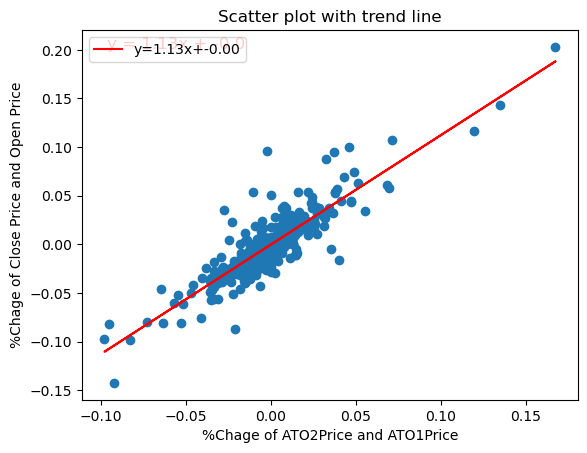

In [90]:
import numpy as np
from scipy import stats

# Create a scatter plot
plt.scatter(clean_merged1['chg_PriceATO2_PriceATO1'], clean_merged1['chg_Ct_Ot'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_merged1['chg_PriceATO2_PriceATO1'], clean_merged1['chg_Ct_Ot'])

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add trend line
plt.plot(clean_merged1['chg_PriceATO2_PriceATO1'], intercept + slope*clean_merged1['chg_PriceATO2_PriceATO1'], 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Set the x and y axis labels
plt.xlabel('%Chage of ATO2Price and ATO1Price')
plt.ylabel('%Chage of Close Price and Open Price')

# Set the plot title and legend
plt.title('Scatter plot with trend line')
plt.legend()

# Add equation to the plot
plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='r')

# Show the plot
plt.show()


The linear equation is 
    
    y = 1.13x
    
    - where y represents the percentage change of today's closing price from today's morning opening price and 
    - x represents the percentage change of afternoon opening price from today's morning opening price.

Example:

- If we know that the afternoon opening price has increased by 2% from the morning opening price.
- Then, y = 1.13 x 2% = 2.26%, meaning the closing price may increase by 2.26% from the morning opening price.
- Now that the afternoon opening price has already risen by 2%, we can expect a remaining probability of 0.26% for the closing price to be higher than the afternoon opening price.
- Therefore, we can buy ATO2 and sell ATC to expect a profit of 0.26%.    

In [46]:
# Find RMSE and R-squared

Predict = clean_merged1['chg_PriceATO2_PriceATO1']*1.13
Real = clean_merged1['chg_Ct_Ot']

# Calculate

from sklearn.metrics import r2_score
rmse = mean_squared_error(Real, Predict, squared=False).round(4)
r_squared = r2_score(Real, Predict).round(4)

print(f"RMSE : {rmse}")
print(f"R-squared : {r_squared}")

RMSE : 0.0161
R-squared : 0.7696


In [62]:
# Calculate the variance
diff = (Predict-Real)*100
mean = round(np.mean(diff),4)
variance = round(np.var(diff),4)

print("Mean of Predict diff from Real:", mean)
print("Variance of Predict diff from Real:", variance)


Mean of Predict diff from Real: 0.0365
Variance of Predict diff from Real: 2.6033


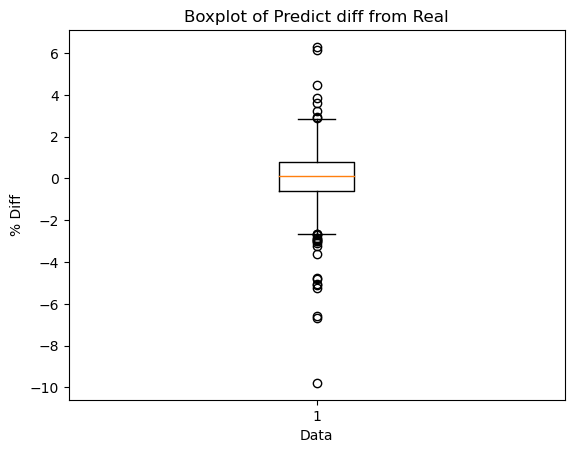

In [61]:
# PLot boxplot

import matplotlib.pyplot as plt

# plot the boxplot
plt.boxplot(diff)

# add labels and title
plt.xlabel('Data')
plt.ylabel('% Diff')
plt.title('Boxplot of Predict diff from Real')

# display the plot
plt.show()

In [106]:
import numpy as np
from scipy import stats

# Create a scatter plot
plt.scatter(clean_merged1['Volume'], clean_merged1['swing'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_merged1['Volume'], clean_merged1['swing'])

# Create line equation
line_eq = "y = " + str(round(slope,8)) + "x + " + str(round(intercept,2))

# Add trend line
plt.plot(clean_merged1['Volume'], intercept + slope*clean_merged1['Volume'], 'r', label='y={:.10f}x+{:.4f}'.format(slope,intercept))

# Set the x and y axis labels
plt.xlabel('Trading Volume')
plt.ylabel('%Chage of Low to High')

# Set the plot title and legend
plt.title('Scatter plot with trend line')
plt.legend()

# Add equation to the plot
plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='r')

# Show the plot
plt.show()


One more thing, I have found a relationship between the percentage swing of price from low to high and the trading volume, which is given by the equation:

    y = 0.0000000101x + 0.0166
    
    by y = the percent change of price from low to high
       x = today's trading volume
       
However, we may not know the trading volume until the end of the day. This means that the high-low price is already known to us, but we can use real-time trading volume to estimate the price swing.

# Next

## Ticker data

### Idea : What the price it look like if ticker matching in the same time.

In [24]:
tick.head()

Last   Vol     Type       Date  tickTime
0  564.0  9000  ATO/ATC 2021-08-27  09:55:26
1  566.0   100      BUY 2021-08-27  09:55:34
2  564.0   300     SELL 2021-08-27  09:55:38
3  564.0   100     SELL 2021-08-27  09:55:48
4  564.0   100     SELL 2021-08-27  09:55:43

In [31]:
# Roughly review intraday trading

firstdate = tick[tick['Date']=='2021-08-27']
firstdate_group = firstdate.groupby(['tickTime','Type']).agg({'Vol': 'sum', 'Last': 'mean'})
firstdate_group = firstdate_group.reset_index()
firstdate_group.head()

tickTime     Type   Vol   Last
0  09:55:26  ATO/ATC  9000  564.0
1  09:55:34      BUY   100  566.0
2  09:55:38     SELL   300  564.0
3  09:55:40     SELL   500  562.0
4  09:55:42     SELL   200  562.0

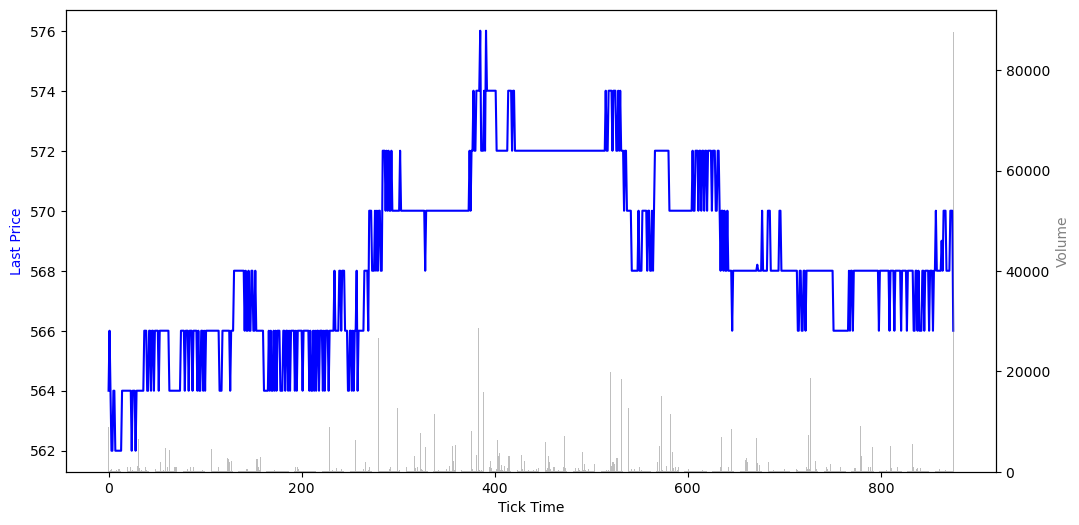

In [33]:
# Plot intraday chart 

import matplotlib.pyplot as plt

# Convert tickTime column to string
firstdate_group['tickTime'] = firstdate_group['tickTime'].astype(str)

#import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(firstdate_group.index, firstdate_group['Last'], color='blue')
ax2.bar(firstdate_group.index, firstdate_group['Vol'], color='gray', alpha=0.5)

ax1.set_xlabel('Tick Time')
ax1.set_ylabel('Last Price', color='blue')
ax2.set_ylabel('Volume', color='gray')

plt.show()

### Here's my idea

My target is to make intraday profits by buying stocks before they run up. My goal is to capture bull runs from low to high prices within a day.

Method

To achieve my target, I will follow the below steps:

- Identify low to high running percentage change, which is the intraday return.
- Classify groups of returns.

Capture parameters

I will capture the following parameters for every single minute:

- Price change
- Trading volume

Additionally, I will create separate parameters for the following time intervals:

- Within 15 minutes after the price goes up 
- Within 0-1 hour before the price goes up 
- Within 1-2 hours before the price goes up 
- Within 2-3 hours before the price goes up 

At this time, I not separate BUY/SELL side cause to easier testing. However for next improve we can add
- Separate BUY/SELL side
- Increase from every single minute focusing to 2 or 3 minute

In [35]:
# Drop ATO/ATC row and drop type column cause I want to focus only ticker

tick_clean = tick.loc[tick['Type'] != 'ATO/ATC']
del tick_clean['Type']
tick_clean.head()

Last  Vol       Date  tickTime
1  566.0  100 2021-08-27  09:55:34
2  564.0  300 2021-08-27  09:55:38
3  564.0  100 2021-08-27  09:55:48
4  564.0  100 2021-08-27  09:55:43
5  562.0  100 2021-08-27  09:55:40

In [39]:
# Group the rows by Date, tickTime and calculate the sum of Vol and the average of Last
grouped_tick = tick_clean.groupby(['Date', 'tickTime']).agg({'Vol': 'sum', 'Last': 'mean'})

grouped_tick = grouped_tick.reset_index()

# Sort the grouped data by Date and tickTime
sorted_tick = grouped_tick.sort_values(['Date', 'tickTime'])

sorted_tick.head(10)

Date  tickTime  Vol   Last
0 2021-08-27  09:55:34  100  566.0
1 2021-08-27  09:55:38  300  564.0
2 2021-08-27  09:55:40  500  562.0
3 2021-08-27  09:55:42  200  562.0
4 2021-08-27  09:55:43  100  564.0
5 2021-08-27  09:55:48  100  564.0
6 2021-08-27  09:56:24  100  562.0
7 2021-08-27  09:56:37  400  562.0
8 2021-08-27  09:56:52  100  562.0
9 2021-08-27  09:57:34  500  562.0

In [45]:
min_max_last = sorted_tick.groupby(['Date'])['Last'].agg(['min', 'max'])
min_max_last = min_max_last.reset_index()
min_max_last.head()

Date    min         max
0 2021-08-27  562.0  576.000000
1 2021-09-02  654.0  734.666667
2 2021-09-03  724.0  789.000000
3 2021-09-07  752.0  781.000000
4 2021-09-08  738.0  774.000000

### This idea not finish yet, I will be back to done it.